In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu118
0.15.1+cu118


In [2]:
#setting up our data
train_data = datasets.FashionMNIST(
    root = "data", #where to download the data?
    train = True,
    download = True,
    transform = transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download= True,
    transform = transforms.ToTensor(),
    target_transform = None
)


100%|██████████| 26421880/26421880 [00:01<00:00, 15531277.64it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 269119.31it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5011838.12it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13378114.62it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
#see the first example
image,label =train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx
     

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets


tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image
print(f'the shape of our image is {image.shape} --> [channel,height, width]')
print(f'the image label is {class_names[label]}')

the shape of our image is torch.Size([1, 28, 28]) --> [channel,height, width]
the image label is Ankle boot


Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

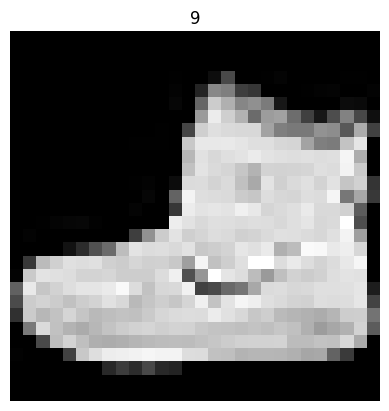

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(),cmap="gray")
plt.title(label);
plt.axis(False)
# image

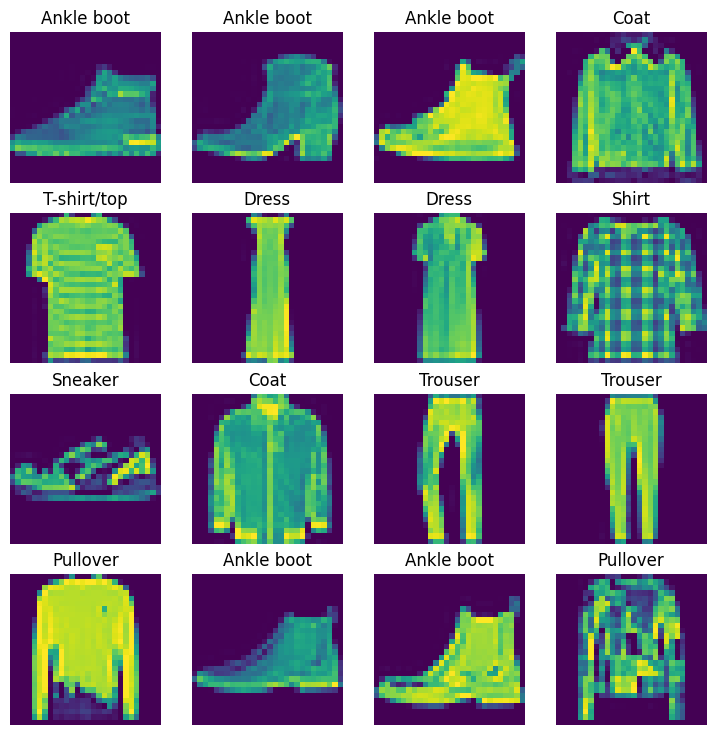

In [10]:
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
   random_idx = torch.randint(0,len(train_data),size=[1]).item()
   img, label = train_data[random_idx]
   fig.add_subplot(rows,cols,i)
   plt.imshow(img.squeeze())
   plt.title(class_names[label])
   plt.axis(False)

Do you think that these images of clothing could be modeled with pure linear lines? or  do you think  we will need non-linearity?

In [11]:
#prepare the dataloader because right now our data is on form of pytorch datasets
# dataloader turns our data into an iterable

#more specifically, we want to turn oyr data into batches or mini batches
# it gives  our neural network more chances to update tje gradients  per epoch
from torch.utils.data import DataLoader

#setup the batch size hyperparamters
batch_size=32

#turn our dataset into iterables( batches )

train_dataloader = DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=batch_size,shuffle=False)






In [12]:
#check out what is inside our dataloader
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

When starting to build a series of machine learningn modelling experiments, its a best practice to start with a basline model. 

A baseline model is a simple model you will try  and improve upon with subsequent models/experiments

In [13]:
#create a flatten layer
model= nn.Flatten()

#get a single sample
example = train_features_batch[0]

output = model(example)

print(f'shape before flattening is {example.shape}')
print(f'shape after flattening is {output.shape} ')


shape before flattening is torch.Size([1, 28, 28])
shape after flattening is torch.Size([1, 784]) 


In [14]:
#creating our model 0

class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_size,hidden_units,num_classes):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),  #this means anything coming to this will be flattened
        nn.Linear(in_features= input_size, out_features = hidden_units),
        nn.Linear(in_features= hidden_units, out_features = num_classes)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [15]:
torch.manual_seed(42)
#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_size=784,   #this i 28 * 28 flattened
    hidden_units=10,
    num_classes = len(class_names)  # one for every class

).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [17]:
## setup loss , optimizer, and evaluation metrics


#calculate accracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()  #torch.eq calculates where two tensors are equal
  accc = (correct /len(y_pred))* 100
  return acc

### or we can just download the helper function into our notebook

import requests
from pathlib import Path
# downlaod helper function from Learn Pytorch
if Path("helper_functions.py").is_file():
  print('helper functions already exist. skipping downlaod...')
else:
  print('downloading the helper functions.')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py",'wb') as f:
    f.write(request.content)
    


downloading the helper functions.


In [18]:
#lets import accuracy metric from helper functions.py
from helper_functions import accuracy_fn

#setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)




In [19]:
#creating a function to time our experiments
#Machine learning is very experimental
# two of the main things you will often want to track here:
# 1--> Model's performance (loss and accuracy etc)
# 2--> How fast it runs

from timeit import default_timer as timer
def print_train_time( start,end,device:torch.device=None):
  total_time= end-start
  print(f'train time on {device}: {total_time:.3f} seconds')
  return total_time
  


In [20]:
start_time = timer()

#some code...
end_time = timer()
print_train_time(start_time, end_time,"cpu")



train time on cpu: 0.000 seconds


5.42299999892748e-05

#creating training loop and training a model on batches of data
1. loop through epochs 
2. loop through training batches, perform training step, calculate the train loss *per batch*
3. loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. whats happening
5. time it all


In [21]:
#import tqdm for proress bar
from tqdm.auto import tqdm
#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of epochs
epochs = 3

#create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f'epoch: {epoch}\n----')
  #training
  train_loss = 0
  # add a loop to loop through training batches
  for batch, (img,label) in enumerate(train_dataloader):
    model_0.train()
    # 1. forward pass
    y_pred = model_0(img)
    
    loss = loss_fn(y_pred,label)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()


    if batch%400==0:
      print(f'looked at {batch * len(img)}/{len(train_dataloader.dataset)} samples')

  #divide total train loss by  length of train dataloader
  train_loss /= len(train_dataloader)


  ### testing loop
  test_loss, test_acc= 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. forward pass
      test_pred = model_0(X_test)

      #2. loss
      test_loss += loss_fn(test_pred,y_test)
      #3 accuracy
      test_acc = accuracy_fn(y_test,test_pred.argmax(dim=1))
    #calculate the test loss average per batch
    test_loss /= len(test_dataloader)
    #calculate  the test acc average per batch
    test_acc /= len(test_dataloader)

  #print out whats happening
  print(f'\n train loss: {train_loss:.4f} | test loss: {test_loss:.4f}, test accuracy: {test_acc:.4f}')

#calculate the training time
train_time_end_on_cpu = timer()
total_train_time_on_model0 = print_train_time(train_time_start_on_cpu,train_time_end_on_cpu,device=str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
----
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss: 0.5904 | test loss: 0.5095, test accuracy: 0.2796
epoch: 1
----
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss: 0.4763 | test loss: 0.4799, test accuracy: 0.2995
epoch: 2
----
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 train loss: 0.4550 | test loss: 0.4766, test accuracy: 0.2995
train time on cpu: 66.579 seconds


In [26]:
#make predictions and get model0 result

torch.manual_seed(42)

def eval_model(
    model: torch.nn.Module,
    data_loader : torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,accuracy_fn):
  #returns a dictionary containing the results of the model predicting on data loader
  loss, acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #make predictions 
      y_pred  = model(X)

      #loss and accuracy per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn( y,y_pred.argmax(dim=1))

    # average loss and accuracy per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name" :model.__class__.__name__, #works only when model was created with a class
            "model_loss": loss.item(),

            "model_acc": acc
            }
#calculate model 0 results on the test dataset
model_0_results = eval_model(
    model = model_0,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [83]:

import torch
import torchvision
import torch.nn as nn


#Convolutional Neural Network
class FashionMNISTModelV2(nn.Module):
  """
  model architecture that replicates TinyVGG
  model from CNN explainer website

  """
  def __init__(self,input_shape,hidden_size,num_classes):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        #create  conv layer
        nn.Conv2d(in_channels= input_shape, out_channels = hidden_size,kernel_size=3,stride=1,padding=1),  #values we set ourselves in our NNs are hyperparameters
        #conv2d means we are working with 2 dimensional dataa
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_size,out_channels=hidden_size,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    #second block
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_size,out_channels= hidden_size,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_size,out_channels=hidden_size,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    #classifier layer 
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_size*7*7,out_features = num_classes) #added 7*7 to make the inputs allign the matrxi of outfetures
    )

  def forward(self,x):
    out = self.conv_block_1(x)
    
    out = self.conv_block_2(out)
    
    out= self.classifier(out)

    return out

  


In [84]:


model2 = FashionMNISTModelV2(input_shape = 1, hidden_size =10,num_classes=len(class_names))
model2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [85]:

rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [86]:
#pass image  through model
model2(rand_image_tensor.unsqueeze(0))

tensor([[-0.0402,  0.0075,  0.0295, -0.0880,  0.0901,  0.0159, -0.0643,  0.0755,
         -0.0385,  0.0262]], grad_fn=<AddmmBackward0>)

In [87]:
#setup a loss function and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model2.parameters(),lr=0.1)


In [88]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               ):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device 
   

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)
    
    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()
  
  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [89]:
model2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.0730,  0.0673, -0.1623],
                        [ 0.1958,  0.2938, -0.2445],
                        [ 0.2897,  0.0624,  0.2463]]],
              
              
                      [[[ 0.0451,  0.1607, -0.0471],
                        [ 0.2570,  0.0493, -0.1556],
                        [ 0.0850, -0.1536, -0.0391]]],
              
              
                      [[[-0.1354,  0.2211, -0.2631],
                        [-0.1537, -0.0941, -0.2004],
                        [ 0.0315, -0.3292,  0.3010]]],
              
              
                      [[[-0.2832,  0.2573,  0.0555],
                        [-0.1082,  0.2060,  0.0520],
                        [ 0.2693,  0.0364, -0.1051]]],
              
              
                      [[[ 0.0896, -0.0904,  0.1403],
                        [ 0.2976,  0.1927, -0.1457],
                        [ 0.1924,  0.0596,  0.1693]]],
              
              
      

In [90]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              accuracy_fn,
             ):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0
  
  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      
      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [93]:
#training and testing our cnn loop
torch.manual_seed(42)

from timeit import default_timer as timer
model2_start = timer()

#train and test loop
epochs=3
for epoch in tqdm(range(epochs)):
  print(f'epoch: {epoch}\n------')
  train_step(model=model2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer=optimizer,
             accuracy_fn = accuracy_fn)
  test_step(model=model2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            
            accuracy_fn = accuracy_fn)
model2_end = timer()
total_time_model2 = print_train_time(model2_start,model2_end)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
------
Train loss: 0.36008 | Train acc: 86.93%
Test loss: 0.34152 | Test acc: 87.86%

epoch: 1
------
Train loss: 0.32632 | Train acc: 88.15%
Test loss: 0.32104 | Test acc: 88.29%

epoch: 2
------
Train loss: 0.30541 | Train acc: 88.88%
Test loss: 0.30971 | Test acc: 88.71%

train time on None: 158.821 seconds


In [94]:
model2_results = eval_model( model=model2,
                            data_loader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                            )
model2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3097056448459625,
 'model_acc': 88.70806709265176}

In [97]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV2,0.309706,88.708067


In [100]:
compare_results["training_time"] = [total_train_time_on_model0,total_time_model2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,66.578933
1,FashionMNISTModelV2,0.309706,88.708067,158.820611


Text(0, 0.5, 'model')

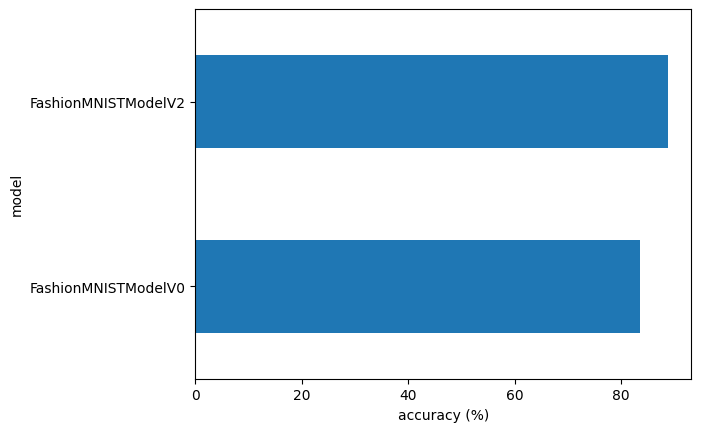

In [102]:
#visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [103]:
#make and evaluate random predictions  with best model
def make_predictions(model: torch.nn.Module,
                     data: list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample (add a batch dimension)
      sample =  torch.unsqueeze(sample,dim=0)

      #forward pass (model outputs raw logits)
      pred_logit = model(sample)

      #get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
# stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)
  





In [105]:
import random
random.seed(42)
test_samples =[]
test_labels = []
for sample,label in random.sample(list( test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

#view the first sample shape
test_samples[0].shape



torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

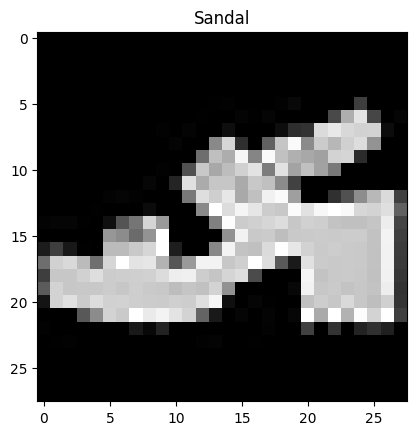

In [107]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [108]:
#make prediction
pred_probs  = make_predictions(model=model2,
                              data = test_samples)

#view first two prediction probabilities
pred_probs[:2]

tensor([[3.0305e-07, 4.1865e-09, 4.0079e-09, 1.5801e-08, 1.5773e-08, 9.9996e-01,
         1.0339e-06, 1.3120e-07, 2.0435e-06, 3.5605e-05],
        [4.5675e-02, 9.2422e-01, 8.0593e-04, 9.0702e-03, 1.6127e-02, 1.0633e-04,
         3.7506e-03, 4.0420e-05, 4.7638e-05, 1.5705e-04]])

In [109]:
#covert predicions probabilites   tolabels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

<ipython-input-114-7fa4c44b3464>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows,n_cols,i+1)


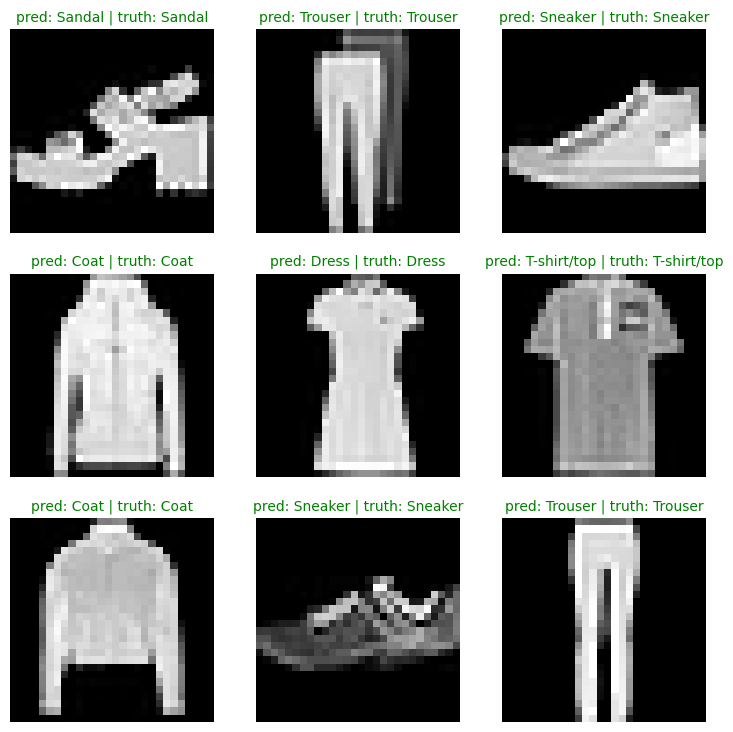

In [114]:
#plot predctions
plt.figure(figsize=(9,9))
n_rows=3
n_cols=3
plt.axis(False)
for i, sample in enumerate(test_samples):
  #create subplot
  plt.subplot(n_rows,n_cols,i+1)
  #plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")
  plt.axis(False)
  #find the prediction label in text form
  pred_label = class_names[pred_classes[i]]
  #get the truth label in text
  truth_label = class_names[test_labels[i]]
  #create a title for the plot
  title_text=  f"pred: {pred_label} | truth: {truth_label}"
  #check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g") #green text if the prediction same as truth
  else:
    plt.title(title_text,c="r")

